# EDA - Mental Health Trends in Social Media

## Objective
Perform comprehensive exploratory data analysis of the Mental Health and Social Media dataset to:
- Understand demographic distribution (age, gender, occupation)
- Analyze social media usage patterns (platforms, time spent, behaviors)
- Explore mental health indicators (distraction, anxiety, depression, sleep)
- Identify correlations between social media usage and mental health
- Detect patterns for predictive modeling
- Prepare features for multi-output regression model

## Dataset
**File**: `06_mental_health_trends_in_the_age_of_social_media.csv`
**Source**: Mental Health and Social Media Survey
**Records**: 481
**Key Variables**: Demographics, Social Media Usage, Mental Health Scores (1-5 scales)

## 1. Import and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from collections import Counter

# For statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, spearmanr

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Path configuration
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
RAW_DATA_DIR = BASE_DIR / 'datasets' / 'raw'
PROCESSED_DATA_DIR = BASE_DIR / 'datasets' / 'processed'

# Create processed directory if it doesn't exist
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)

print("Setup complete!")

Setup complete!


## 2. Data loading

In [2]:
df = pd.read_csv(RAW_DATA_DIR / '06_mental_health_trends_in_the_age_of_social_media.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
df

Dataset shape: (481, 21)
Total records: 481
Total columns: 21


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.00,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.00,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.00,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.00,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.00,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.00,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


## 3. General Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [4]:
print("Original column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Original column names:
 1. Timestamp
 2. 1. What is your age?
 3. 2. Gender
 4. 3. Relationship Status
 5. 4. Occupation Status
 6. 5. What type of organizations are you affiliated with?
 7. 6. Do you use social media?
 8. 7. What social media platforms do you commonly use?
 9. 8. What is the average time you spend on social media every day?
10. 9. How often do you find yourself using Social media without a specific purpose?
11. 10. How often do you get distracted by Social media when you are busy doing something?
12. 11. Do you feel restless if you haven't used Social media in a while?
13. 12. On a scale of 1 to 5, how easily distracted are you?
14. 13. On a scale of 1 to 5, how much are you bothered by worries?
15. 14. Do you find it difficult to concentrate on things?
16. 15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
17. 16. Following the previous question, how do you feel about these comparisons, generally speak

In [5]:
df.isnull().any()

Timestamp                                                                                                               False
1. What is your age?                                                                                                    False
2. Gender                                                                                                               False
3. Relationship Status                                                                                                  False
4. Occupation Status                                                                                                    False
5. What type of organizations are you affiliated with?                                                                   True
6. Do you use social media?                                                                                             False
7. What social media platforms do you commonly use?                                                                   

In [6]:
df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

## 4. Column Renaming
The originl column names are survey question(very long). Let's create a short name

In [7]:
# Create a mapping for cleaner column names
column_mapping = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'organization',
    '6. Do you use social media?': 'uses_social_media',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'daily_usage_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'usage_without_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distraction_level',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'restlessness',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'easily_distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level',
    '14. Do you find it difficult to concentrate on things?': 'concentration_difficulty',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'social_comparison',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'comparison_feelings',
    '17. How often do you look to seek validation from features of social media?': 'validation_seeking',
    '18. How often do you feel depressed or down?': 'depression_level',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues'
}

In [8]:
df.rename(columns=column_mapping, inplace=True)

In [9]:
print("Column names after renaming:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
df

Column names after renaming:
 1. timestamp
 2. age
 3. gender
 4. relationship_status
 5. occupation_status
 6. organization
 7. uses_social_media
 8. platforms
 9. daily_usage_time
10. usage_without_purpose
11. distraction_level
12. restlessness
13. easily_distracted
14. worry_level
15. concentration_difficulty
16. social_comparison
17. comparison_feelings
18. validation_seeking
19. depression_level
20. interest_fluctuation
21. sleep_issues


,timestamp,age,gender,relationship_status,occupation_status,organization,uses_social_media,platforms,daily_usage_time,usage_without_purpose,distraction_level,restlessness,easily_distracted,worry_level,concentration_difficulty,social_comparison,comparison_feelings,validation_seeking,depression_level,interest_fluctuation,sleep_issues
0,4/18/2022 19:18:47,21.00,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.00,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.00,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.00,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.00,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.00,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


## 5. Missing values Analysis

In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_values

timestamp                  0.00
age                        0.00
gender                     0.00
relationship_status        0.00
occupation_status          0.00
organization               6.24
uses_social_media          0.00
platforms                  0.00
daily_usage_time           0.00
usage_without_purpose      0.00
distraction_level          0.00
restlessness               0.00
easily_distracted          0.00
worry_level                0.00
concentration_difficulty   0.00
social_comparison          0.00
comparison_feelings        0.00
validation_seeking         0.00
depression_level           0.00
interest_fluctuation       0.00
sleep_issues               0.00
dtype: float64

In [12]:
missing_percent

timestamp                  0.00
age                        0.00
gender                     0.00
relationship_status        0.00
occupation_status          0.00
organization               6.24
uses_social_media          0.00
platforms                  0.00
daily_usage_time           0.00
usage_without_purpose      0.00
distraction_level          0.00
restlessness               0.00
easily_distracted          0.00
worry_level                0.00
concentration_difficulty   0.00
social_comparison          0.00
comparison_feelings        0.00
validation_seeking         0.00
depression_level           0.00
interest_fluctuation       0.00
sleep_issues               0.00
dtype: float64

In [13]:
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percent': missing_percent.values
})


In [14]:
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Values Summary:")
print(missing_df.to_string(index=False))

Missing Values Summary:
      Column  Missing_Count  Missing_Percent
organization             30             6.24


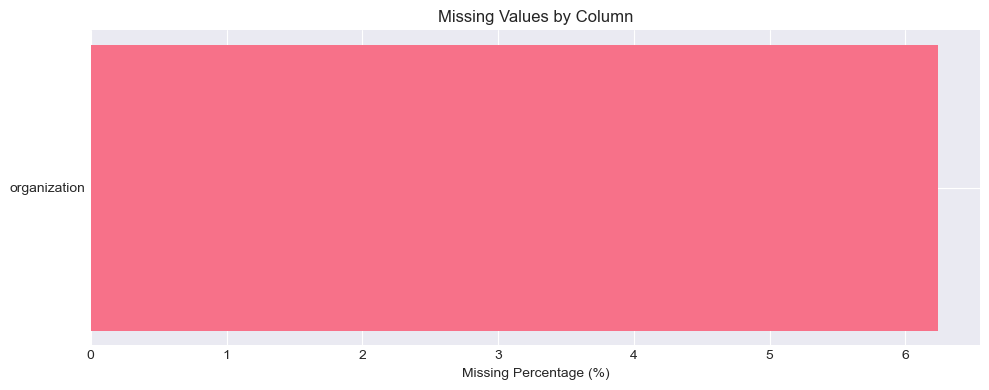

In [17]:
# Visualize
if len(missing_df) > 0:
    plt.figure(figsize=(10, 4))
    plt.barh(missing_df['Column'], missing_df['Missing_Percent'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found!")

## 6. Demographic Analysis

### Age distribution

In [18]:
df['age'].describe()

count   481.00
mean     26.14
std       9.92
min      13.00
25%      21.00
50%      22.00
75%      26.00
max      91.00
Name: age, dtype: float64

In [ ]:
print(f"\nAge range: {df['age'].min():.0f} - {df['age'].max():.0f} years")
print(f"Median age: {df['age'].median():.0f} years")


Age range: 13 - 91 years
Median age: 22 years


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

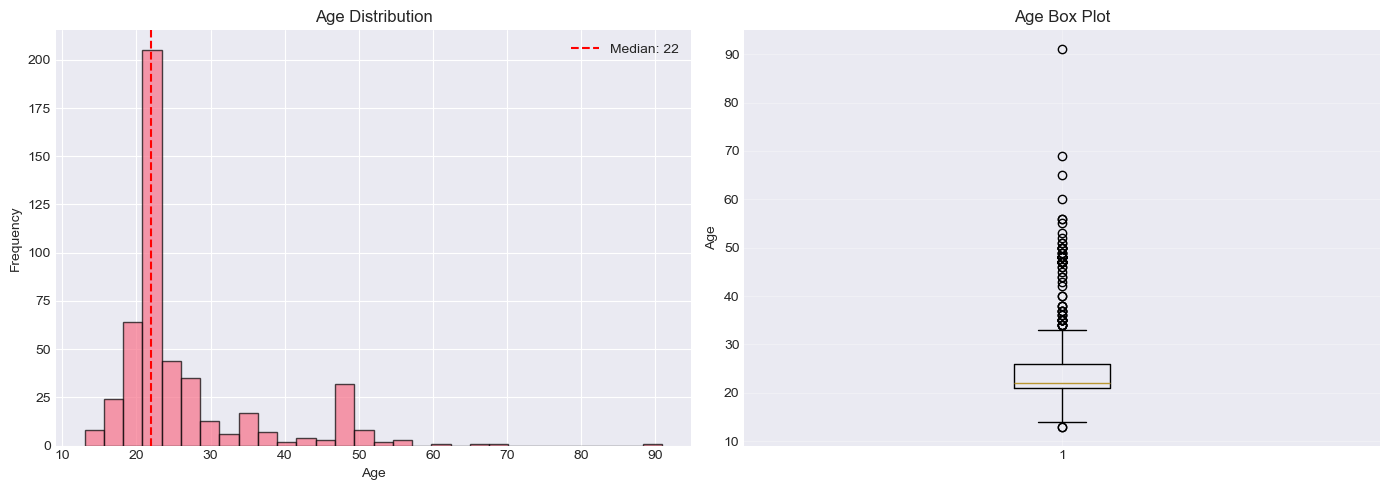

In [21]:
# histogram
axes[0].hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution')
axes[0].axvline(df['age'].median(), color='red', linestyle='--', label=f'Median: {df["age"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['age'].dropna(), vert=True)
axes[1].set_ylabel('Age')
axes[1].set_title('Age Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# age groups
age_bins = [0,20,25,30,40,100]
age_labels = ['<20', '20-24', '25-29', '30-39', '40+']

In [23]:
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)


In [24]:
print("\nAge Group Distribution:")
print(df['age_group'].value_counts().sort_index())


Age Group Distribution:
age_group
<20       96
20-24    249
25-29     47
30-39     33
40+       56
Name: count, dtype: int64


### Gender, relationship and occupation

In [25]:
# Create subplots for categorical demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [26]:
# Gender
gender_counts = df['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title(f'Gender Distribution (n={len(df)})')

Text(0.5, 1.0, 'Gender Distribution (n=481)')

In [27]:

# Relationship Status
relationship_counts = df['relationship_status'].value_counts()
axes[0, 1].barh(relationship_counts.index, relationship_counts.values)
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_title('Relationship Status')
for i, v in enumerate(relationship_counts.values):
    axes[0, 1].text(v + 5, i, str(v), va='center')




In [28]:
# Occupation Status
occupation_counts = df['occupation_status'].value_counts()
axes[1, 0].barh(occupation_counts.index, occupation_counts.values, color='coral')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Occupation Status')
for i, v in enumerate(occupation_counts.values):
    axes[1, 0].text(v + 5, i, str(v), va='center')


In [29]:
# Uses Social Media
social_media_counts = df['uses_social_media'].value_counts()
axes[1, 1].pie(social_media_counts, labels=social_media_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[1, 1].set_title('Uses Social Media')

Text(0.5, 1.0, 'Uses Social Media')

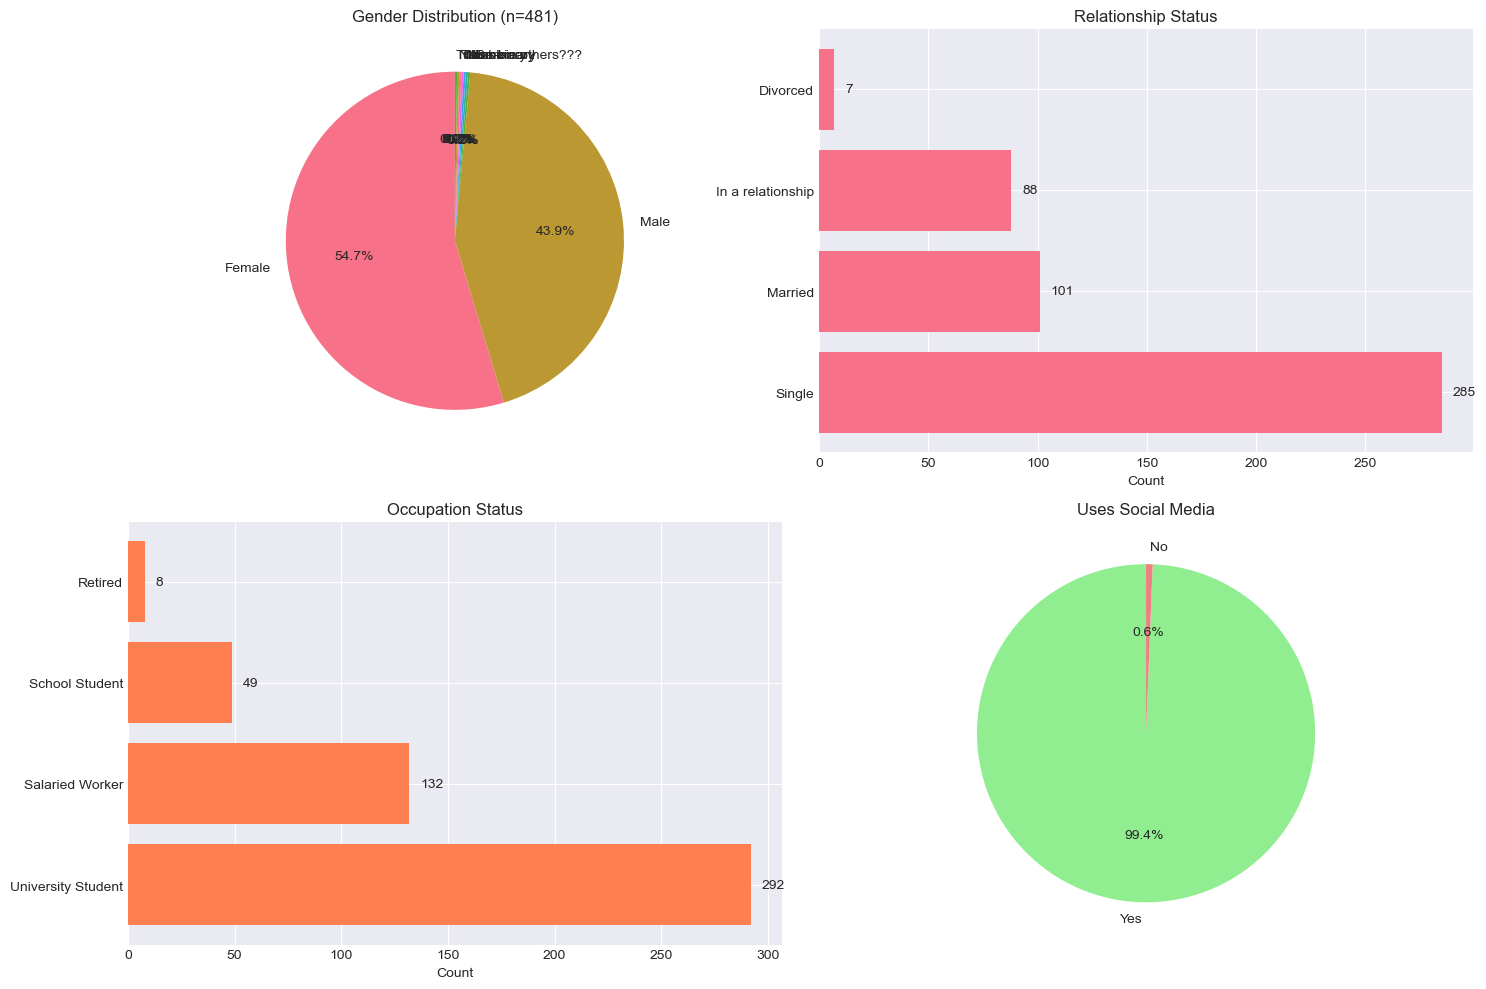

In [30]:

plt.tight_layout()
plt.show()

In [31]:
# statistics
print(f"\nGender:\n{df['gender'].value_counts()}")
print(f"\nRelationship Status:\n{df['relationship_status'].value_counts()}")
print(f"\nOccupation Status:\n{df['occupation_status'].value_counts()}")
print(f"\nUses Social Media:\n{df['uses_social_media'].value_counts()}")


Gender:
gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

Relationship Status:
relationship_status
Single               285
Married              101
In a relationship     88
Divorced               7
Name: count, dtype: int64

Occupation Status:
occupation_status
University Student    292
Salaried Worker       132
School Student         49
Retired                 8
Name: count, dtype: int64

Uses Social Media:
uses_social_media
Yes    478
No       3
Name: count, dtype: int64


## 7. Social media usage analysis

In [32]:
print(df['daily_usage_time'].value_counts().sort_index())

daily_usage_time
Between 1 and 2 hours     70
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 4 and 5 hours     67
Less than an Hour         34
More than 5 hours        116
Name: count, dtype: int64


In [33]:
# Define order for plotting
time_order = [
    'Less than an Hour',
    'Between 1 and 2 hours',
    'Between 2 and 3 hours',
    'Between 3 and 4 hours',
    'Between 4 and 5 hours',
    'More than 5 hours'
]

In [34]:
time_counts = df['daily_usage_time'].value_counts()
time_counts

daily_usage_time
More than 5 hours        116
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     70
Between 4 and 5 hours     67
Less than an Hour         34
Name: count, dtype: int64

In [35]:
existing_order = [t for t in time_order if t in time_counts.index]

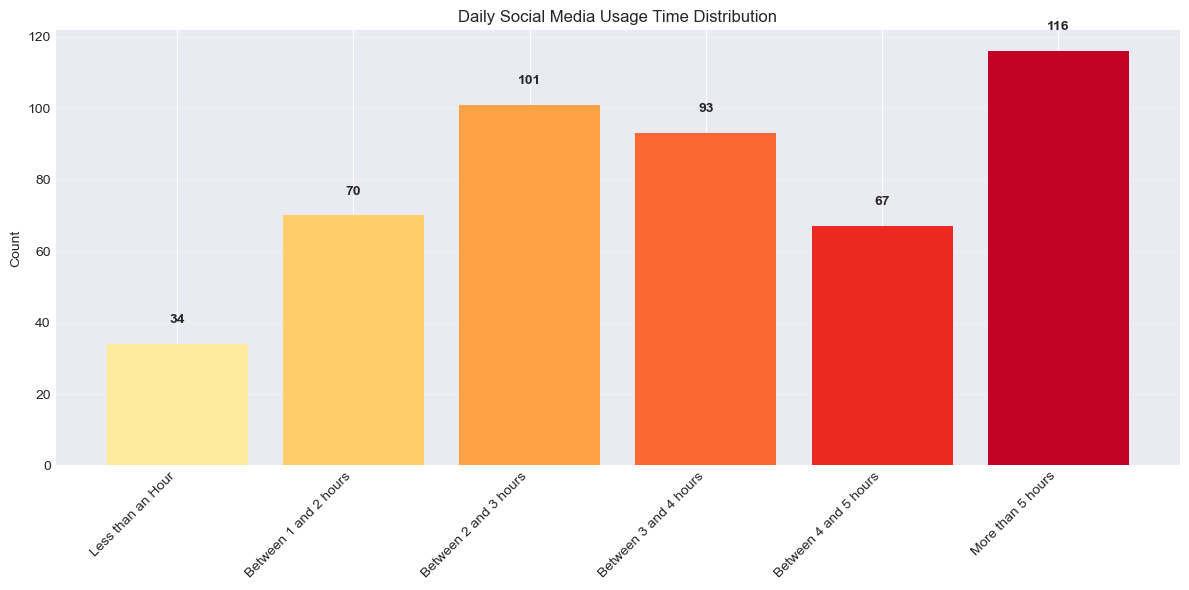

In [36]:
plt.figure(figsize=(12, 6))
time_data = df['daily_usage_time'].value_counts().reindex(existing_order)
bars = plt.bar(range(len(time_data)), time_data.values, color=sns.color_palette("YlOrRd", len(time_data)))
plt.xticks(range(len(time_data)), time_data.index, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Daily Social Media Usage Time Distribution')
plt.grid(axis='y', alpha=0.3)

# add value labels on bars
for i, (bar, val) in enumerate(zip(bars, time_data.values)):
    plt.text(bar.get_x() + bar.get_width()/2, val + 5, str(val),
    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [37]:
# Convert to numeric for analysis (midpoint of range)
usage_time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 6.0
}

In [38]:
df['daily_usage_hours'] = df['daily_usage_time'].map(usage_time_mapping)

In [39]:
print(f"\nAverage daily usage: {df['daily_usage_hours'].mean():.2f} hours")
print(f"Median daily usage: {df['daily_usage_hours'].median():.2f} hours")


Average daily usage: 3.53 hours
Median daily usage: 3.50 hours


### Platform analysis

In [40]:
all_platforms = []
for platforms_str in df['platforms'].dropna():
    if isinstance(platforms_str, str):
        #split by comma and clean
        platforms_list = [p.strip() for p in platforms_str.split(',')]
        all_platforms.extend(platforms_list)

In [41]:
#count platforms
platforms_counts = Counter(all_platforms)
platforms_df = pd.DataFrame(platforms_counts.most_common(), columns=['Platform', 'Count'])

In [43]:
platforms_df['Percentage'] = (platforms_df['Count']  / len(df)) * 100
print(platforms_df.to_string(index=False))

 Platform  Count  Percentage
  YouTube    412       85.65
 Facebook    407       84.62
Instagram    359       74.64
  Discord    198       41.16
 Snapchat    181       37.63
Pinterest    145       30.15
  Twitter    131       27.23
   Reddit    126       26.20
   TikTok     94       19.54


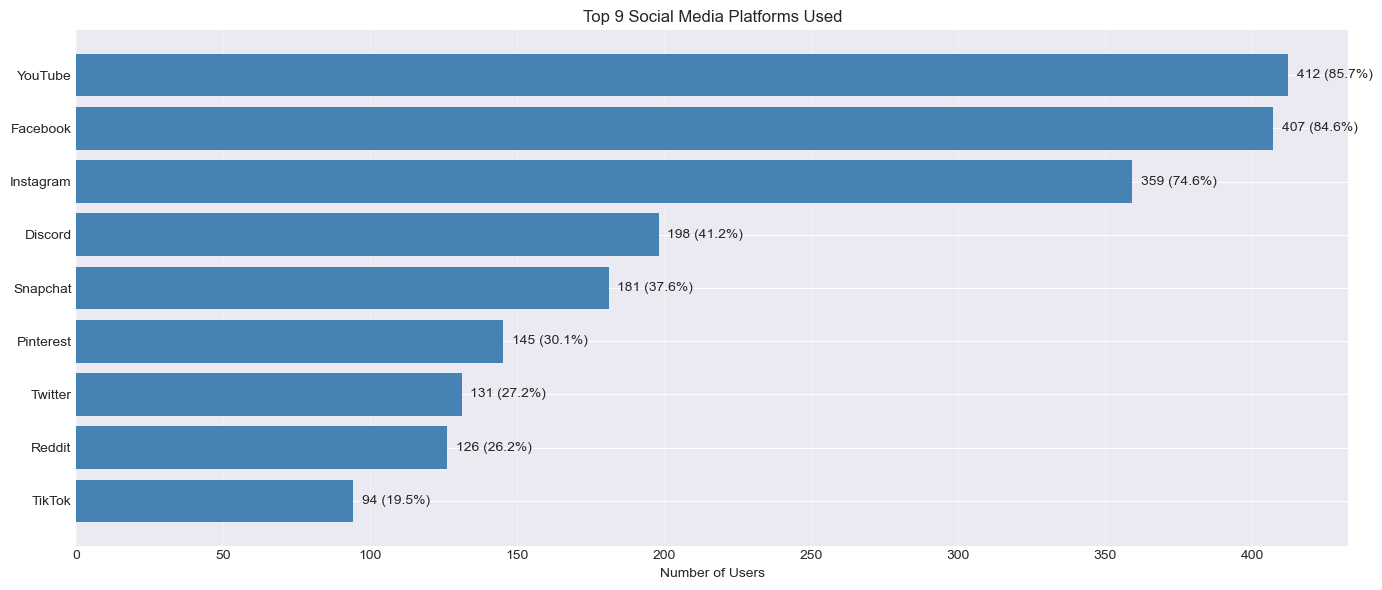

In [44]:
# Visualize to platforms
plt.figure(figsize=(14, 6))
top_n = min(15,len(platforms_df))
plt.barh(platforms_df['Platform'][:top_n][::-1], platforms_df['Count'][:top_n][::-1], color='steelblue')
plt.xlabel('Number of Users')
plt.title(f'Top {top_n} Social Media Platforms Used')
plt.grid(axis='x', alpha=0.3)

for i, (platform, count) in enumerate(zip(platforms_df['Platform'][:top_n][::-1], platforms_df['Count'][:top_n][::-1])):
    plt.text(count + 3, i, f"{count} ({count/len(df)*100:.1f}%)", va='center')

plt.tight_layout()
plt.show()

In [45]:
# number of platforms per user
df['num_platforms'] = df['platforms'].apply(lambda x: len(x.split(',') if isinstance(x, str) else 0))
print(f"\nAverage number of platforms per user: {df['num_platforms'].mean():.2f}")
print(f"Median number of platforms per user: {df['num_platforms'].median():.0f}")


Average number of platforms per user: 4.27
Median number of platforms per user: 4


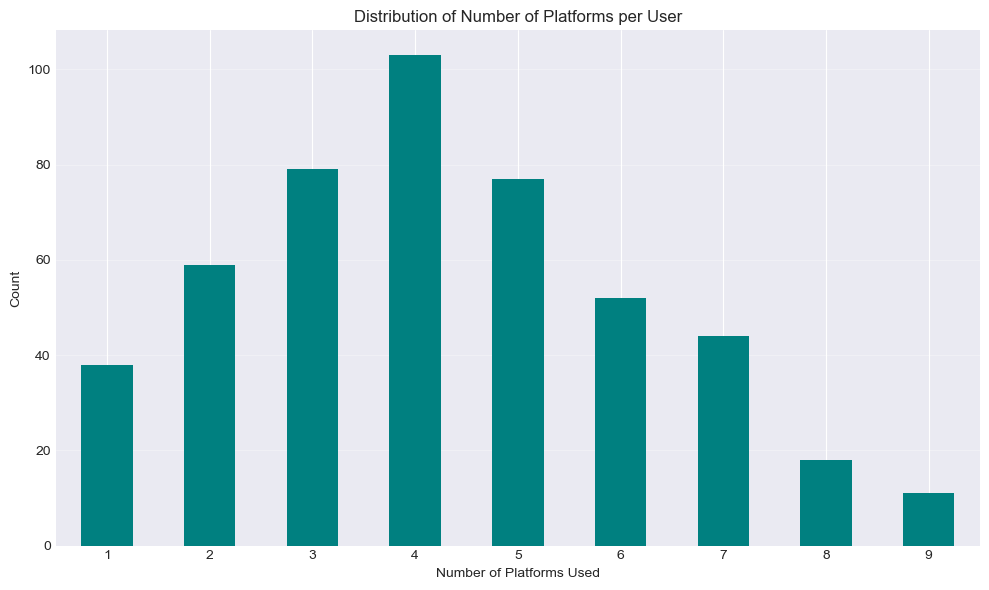

In [46]:
plt.figure(figsize=(10,6))
df['num_platforms'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.xlabel('Number of Platforms Used')
plt.ylabel('Count')
plt.title('Distribution of Number of Platforms per User')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Social media behavior patterns

In [47]:
behavior_cols = ['usage_without_purpose', 'distraction_level', 'restlessness']


In [48]:
for col in behavior_cols:
    print(f"\n{col.replace('_', ' ').title()}:")
    print(df[col].describe())


Usage Without Purpose:
count   481.00
mean      3.55
std       1.10
min       1.00
25%       3.00
50%       4.00
75%       4.00
max       5.00
Name: usage_without_purpose, dtype: float64

Distraction Level:
count   481.00
mean      3.32
std       1.33
min       1.00
25%       2.00
50%       3.00
75%       4.00
max       5.00
Name: distraction_level, dtype: float64

Restlessness:
count   481.00
mean      2.59
std       1.26
min       1.00
25%       2.00
50%       2.00
75%       3.00
max       5.00
Name: restlessness, dtype: float64


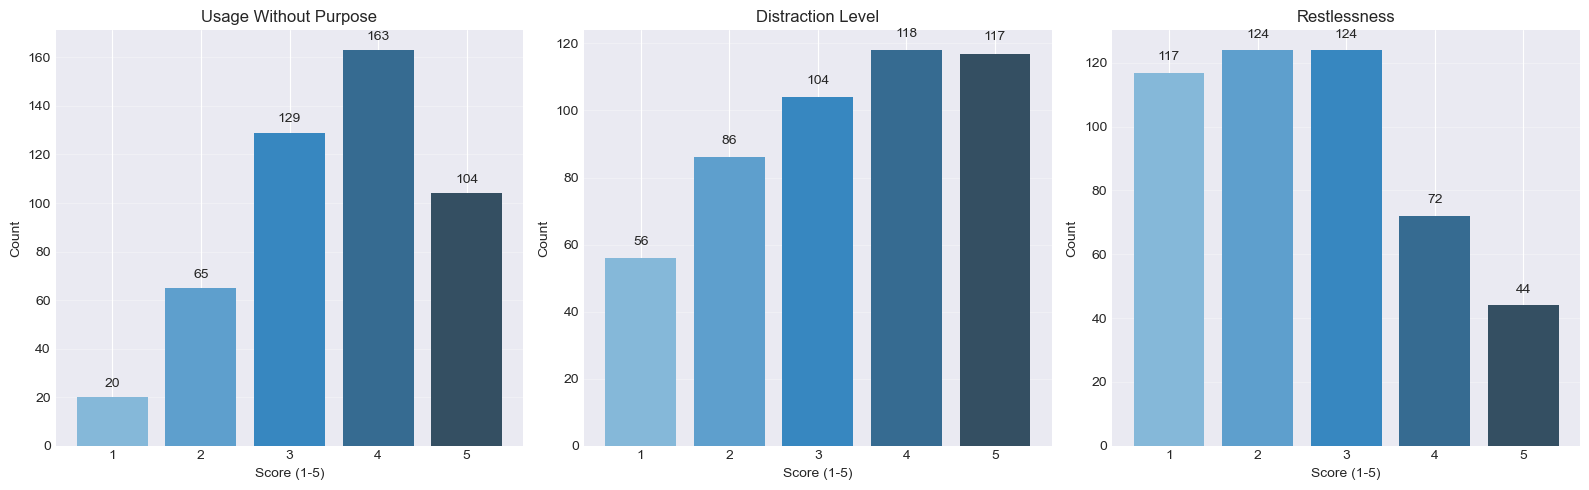

In [49]:
# visualize
ig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(behavior_cols):
    counts = df[col].value_counts().sort_index()
    axes[idx].bar(counts.index, counts.values, color=sns.color_palette("Blues_d", len(counts)))
    axes[idx].set_xlabel('Score (1-5)')
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(col.replace('_', ' ').title())
    axes[idx].set_xticks(range(1, 6))
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for x, y in zip(counts.index, counts.values):
        axes[idx].text(x, y + 3, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 9. Mental Health Indicator Analysis

In [ ]:
# mental health indicators columns (all are 1-5 scale)
mental_health_cols = [
    'easily_distracted',
    'worry_level',
    'concentration_difficulty',
    'social_comparison',
    'validation_seeking',
    'depression_level',
    'interest_fluctuation',
    'sleep_issues'
]

In [51]:
summary_stats = df[mental_health_cols].describe().T

In [52]:
summary_stats['median'] = df[mental_health_cols].median()
print(summary_stats[['mean', 'median', 'std', 'min', 'max']])

                          mean  median  std  min  max
easily_distracted         3.35    3.00 1.18 1.00 5.00
worry_level               3.56    4.00 1.28 1.00 5.00
concentration_difficulty  3.25    3.00 1.35 1.00 5.00
social_comparison         2.83    3.00 1.41 1.00 5.00
validation_seeking        2.46    2.00 1.25 1.00 5.00
depression_level          3.26    3.00 1.31 1.00 5.00
interest_fluctuation      3.17    3.00 1.26 1.00 5.00
sleep_issues              3.20    3.00 1.46 1.00 5.00


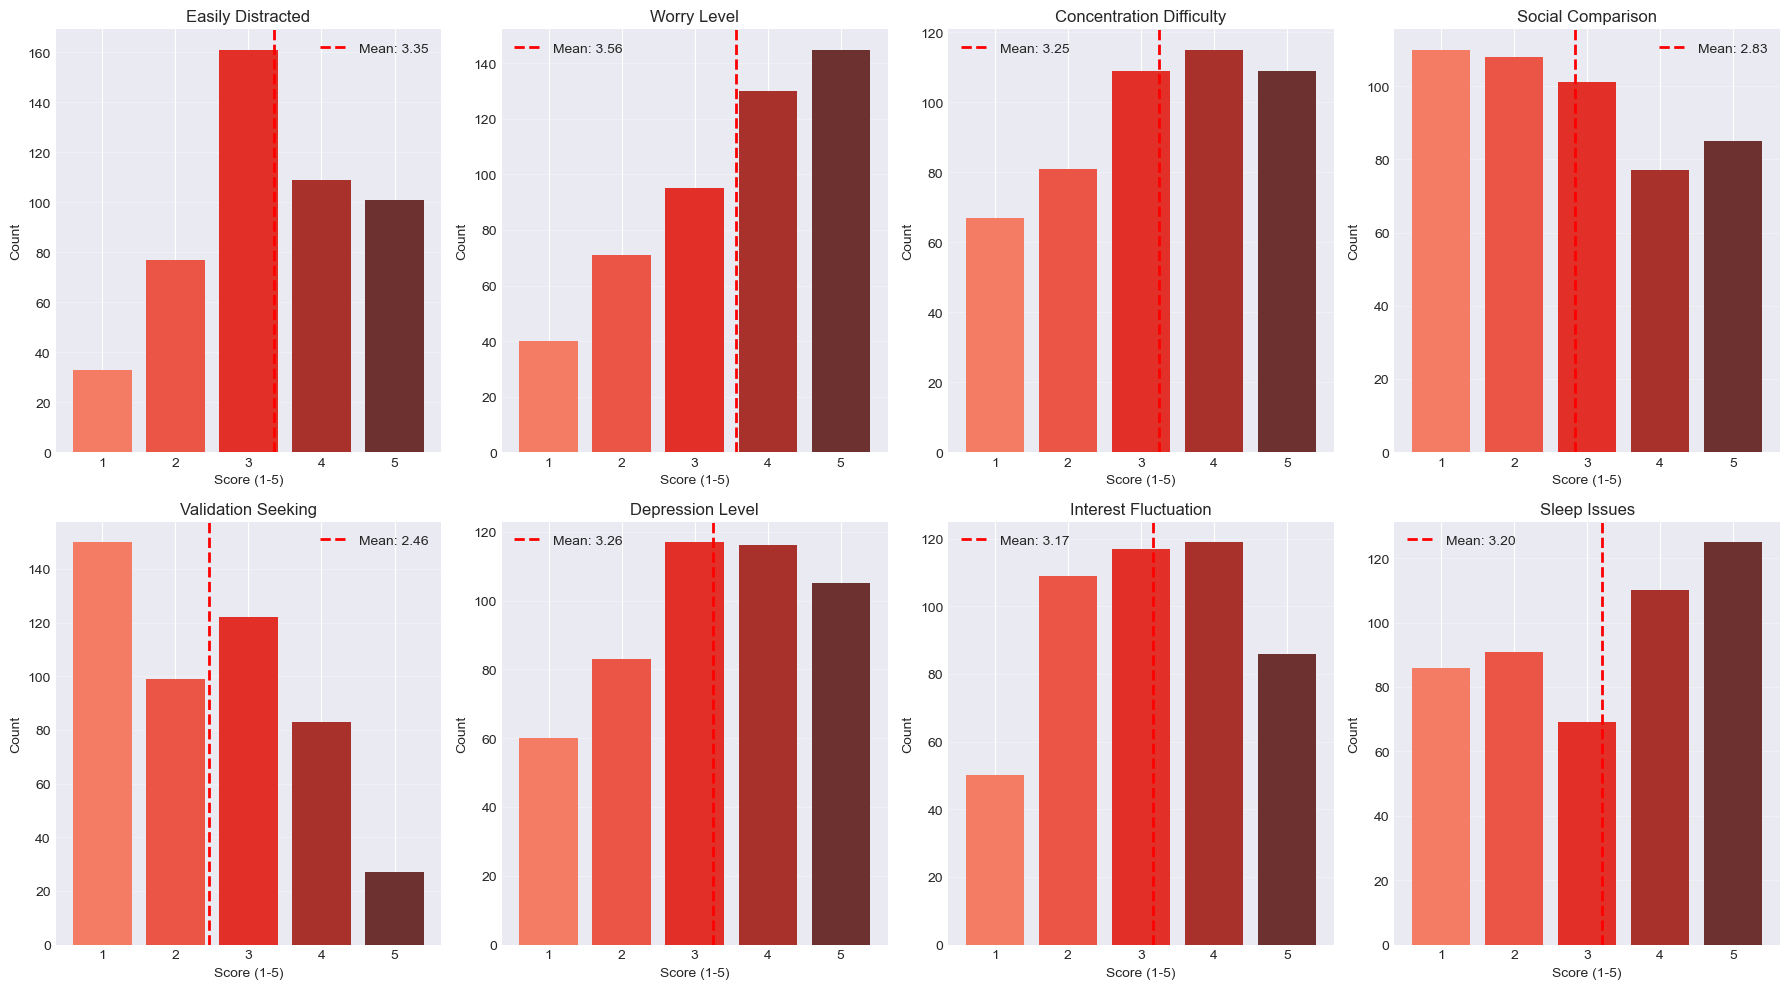

In [53]:
# visualize distributions
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()
for idx, col in enumerate(mental_health_cols):
    counts = df[col].value_counts().sort_index()
    axes[idx].bar(counts.index, counts.values, color=sns.color_palette("Reds_d", len(counts)))
    axes[idx].set_xlabel('Score (1-5)')
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(col.replace('_', ' ').title())
    axes[idx].set_xticks(range(1, 6))
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()


### Mental Health score categories

In [54]:
def categorize_risk(score):
    if pd.isna(score):
        return 'Unknown'
    elif score >= 4:
        return 'High'
    elif score == 3:
        return 'Medium'
    else:
        return 'Low'

In [55]:
risk_indicators = ['depression_level', 'worry_level', 'sleep_issues', 'easily_distracted']

In [56]:
for col in risk_indicators:
    risk_col = f'{col}_risk'
    df[risk_col] = df[col].apply(categorize_risk)

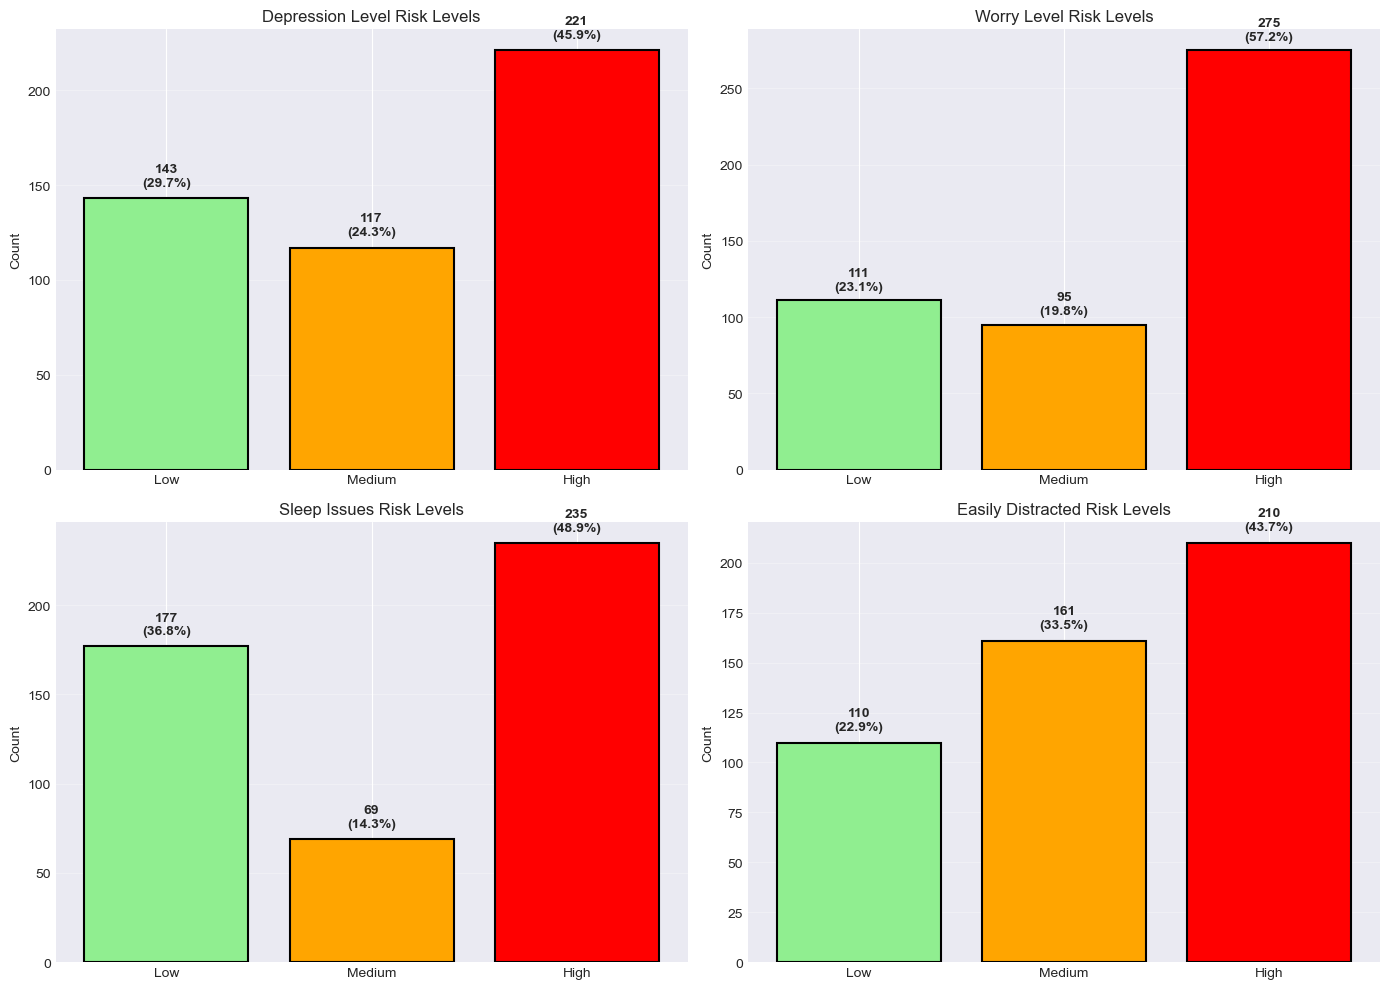

In [57]:
# visualize risk distribuitons
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

risk_colors = {'Low': 'lightgreen', 'Medium': 'orange', 'High': 'red'}

for idx, col in enumerate(risk_indicators):
    risk_col = f'{col}_risk'
    risk_counts = df[risk_col].value_counts()
    
    # Order: Low, Medium, High
    order = ['Low', 'Medium', 'High']
    ordered_counts = [risk_counts.get(cat, 0) for cat in order]
    colors = [risk_colors[cat] for cat in order]
    
    axes[idx].bar(order, ordered_counts, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'{col.replace("_", " ").title()} Risk Levels')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add percentages
    total = sum(ordered_counts)
    for i, (cat, count) in enumerate(zip(order, ordered_counts)):
        pct = (count / total) * 100
        axes[idx].text(i, count + 5, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [58]:
# summary statistics
for col in risk_indicators:
    risk_col = f'{col}_risk'
    print(f"\n{col.replace('_', ' ').title()} Risk Levels:")
    print(df[risk_col].value_counts())


Depression Level Risk Levels:
depression_level_risk
High      221
Low       143
Medium    117
Name: count, dtype: int64

Worry Level Risk Levels:
worry_level_risk
High      275
Low       111
Medium     95
Name: count, dtype: int64

Sleep Issues Risk Levels:
sleep_issues_risk
High      235
Low       177
Medium     69
Name: count, dtype: int64

Easily Distracted Risk Levels:
easily_distracted_risk
High      210
Medium    161
Low       110
Name: count, dtype: int64


## 10. Correlation Analysis

In [59]:
numeric_features = [
    'age',
    'daily_usage_hours',
    'num_platforms',
    'usage_without_purpose',
    'distraction_level',
    'restlessness',
    'easily_distracted',
    'worry_level',
    'concentration_difficulty',
    'social_comparison',
    'validation_seeking',
    'depression_level',
    'interest_fluctuation',
    'sleep_issues'
]


In [60]:
corr_matrix = df[numeric_features].corr()


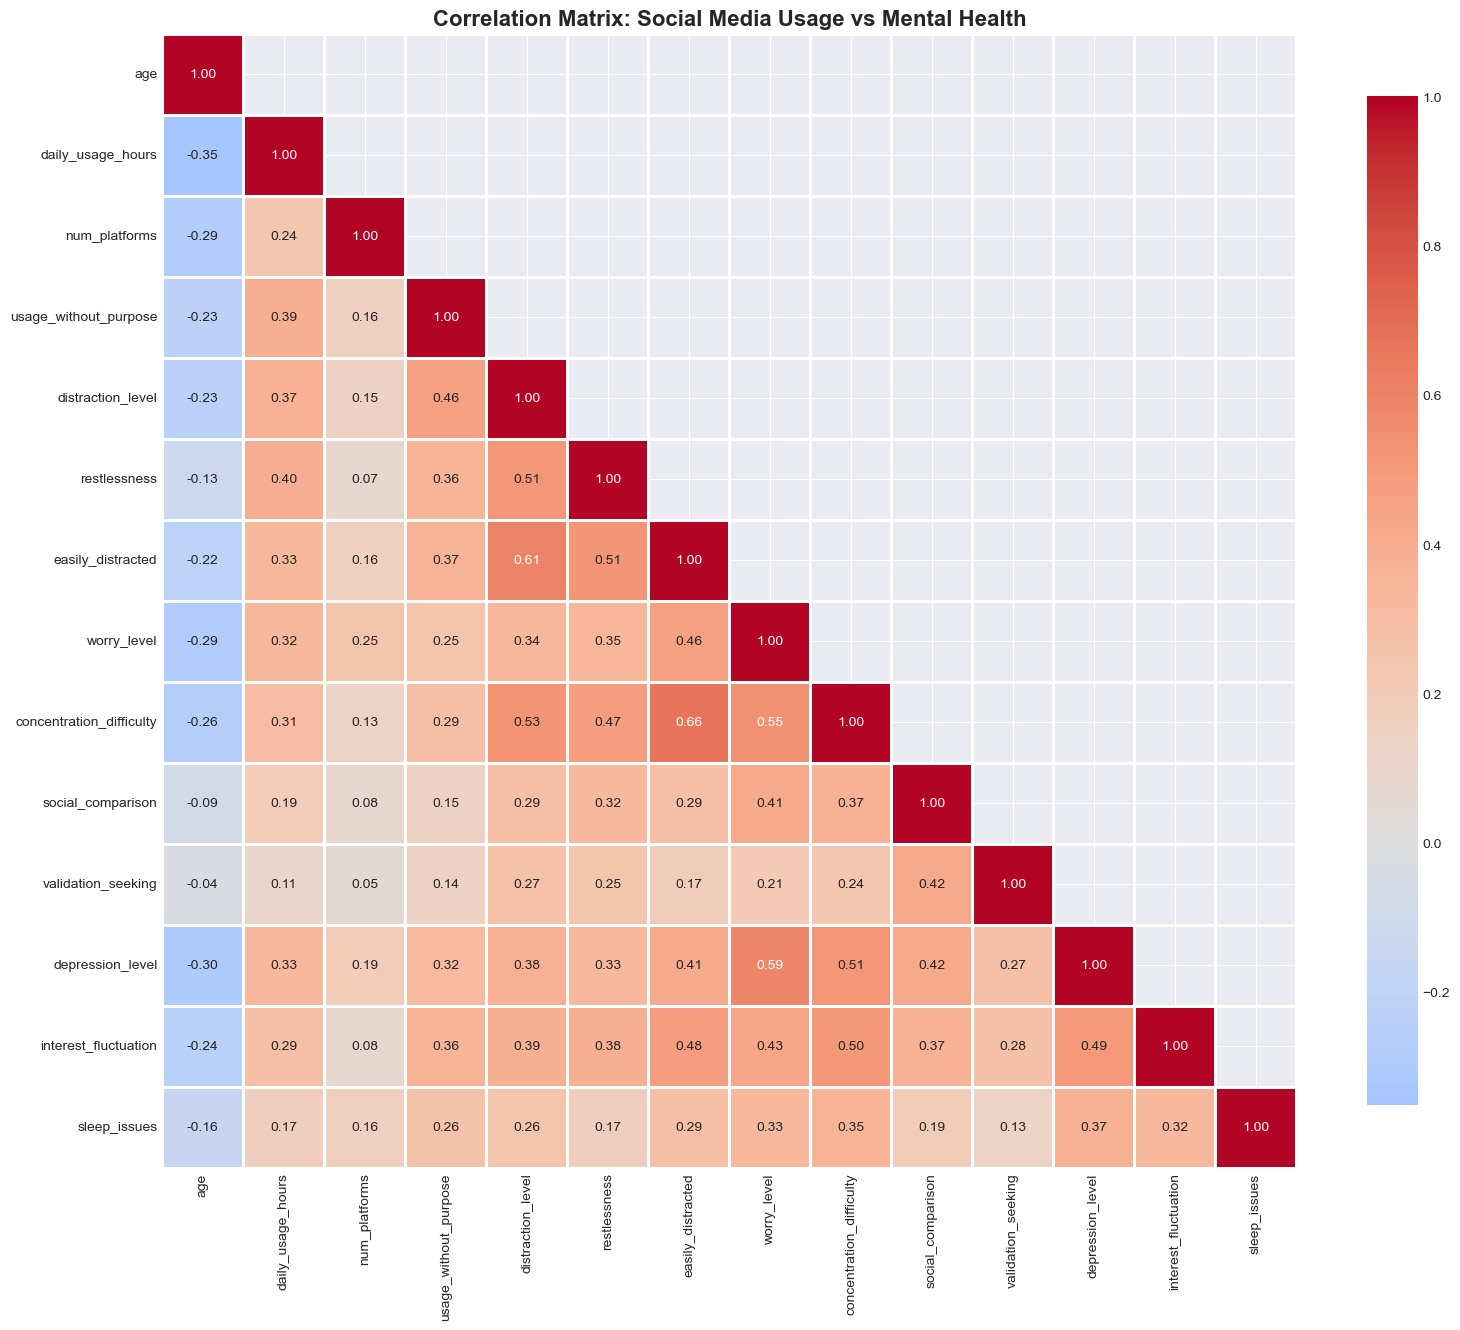

In [61]:
# Visualize full correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Social Media Usage vs Mental Health', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [62]:
# find strong correlation
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
print(strong_corr_df.to_string(index=False))

               Feature 1                Feature 2  Correlation
       easily_distracted concentration_difficulty         0.66
       distraction_level        easily_distracted         0.61
             worry_level         depression_level         0.59
             worry_level concentration_difficulty         0.55
       distraction_level concentration_difficulty         0.53
            restlessness        easily_distracted         0.51
       distraction_level             restlessness         0.51
concentration_difficulty         depression_level         0.51
concentration_difficulty     interest_fluctuation         0.50


### Target correlation

In [63]:
# Focus on correlations with mental health targets
mental_health_targets = [
    'depression_level',
    'worry_level',
    'sleep_issues',
    'easily_distracted',
    'concentration_difficulty'
]


In [64]:
usage_features = [
    'daily_usage_hours',
    'num_platforms',
    'usage_without_purpose',
    'distraction_level',
    'restlessness'
]

In [65]:
# create focused correlation matrix
target_corr = df[usage_features + mental_health_targets].corr().loc[usage_features, mental_health_targets]


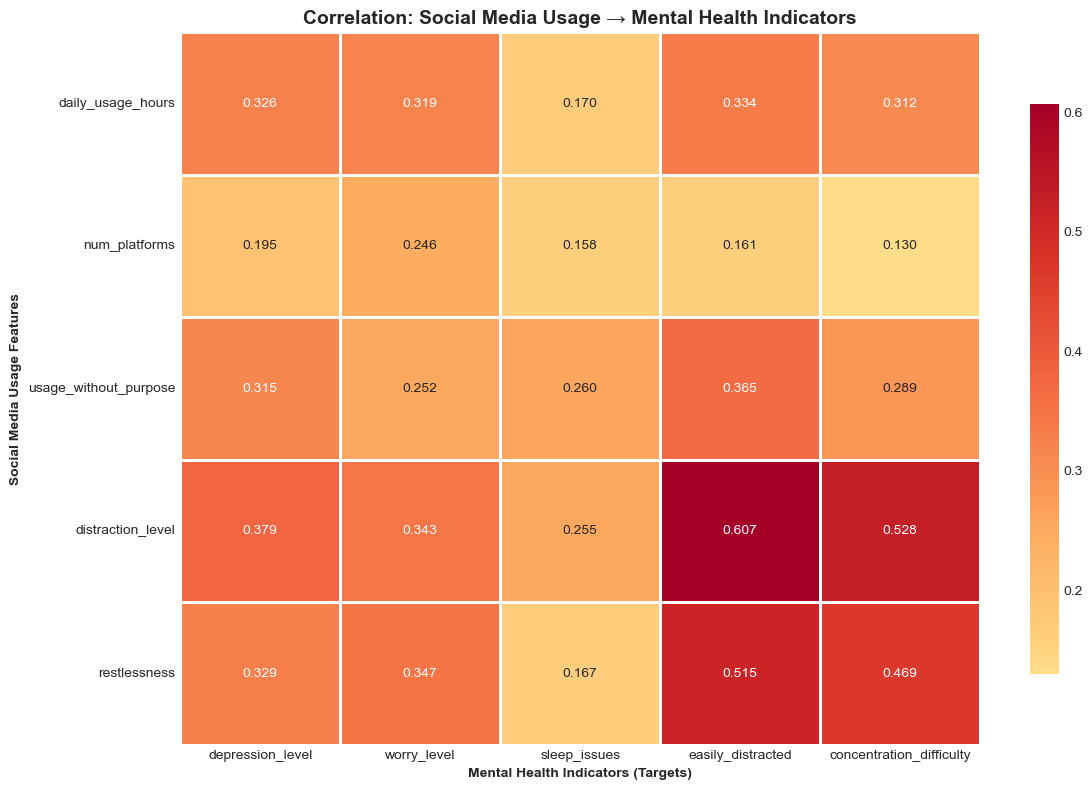

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(target_corr, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation: Social Media Usage → Mental Health Indicators', fontsize=14, fontweight='bold')
plt.xlabel('Mental Health Indicators (Targets)', fontweight='bold')
plt.ylabel('Social Media Usage Features', fontweight='bold')
plt.tight_layout()
plt.show()

In [68]:
# key findinfs
for target in mental_health_targets:
    print(f"\n{target.replace('_', ' ').title()}:")
    correlations = target_corr[target].sort_values(ascending=False)
    for feature, corr in correlations.items():
        if abs(corr) > 0.3:
            print(f"  {feature:30s}: {corr:+.3f}")


Depression Level:
  distraction_level             : +0.379
  restlessness                  : +0.329
  daily_usage_hours             : +0.326
  usage_without_purpose         : +0.315

Worry Level:
  restlessness                  : +0.347
  distraction_level             : +0.343
  daily_usage_hours             : +0.319

Sleep Issues:

Easily Distracted:
  distraction_level             : +0.607
  restlessness                  : +0.515
  usage_without_purpose         : +0.365
  daily_usage_hours             : +0.334

Concentration Difficulty:
  distraction_level             : +0.528
  restlessness                  : +0.469
  daily_usage_hours             : +0.312


## 11. Bivariate Analysis: Usage time vs mental health

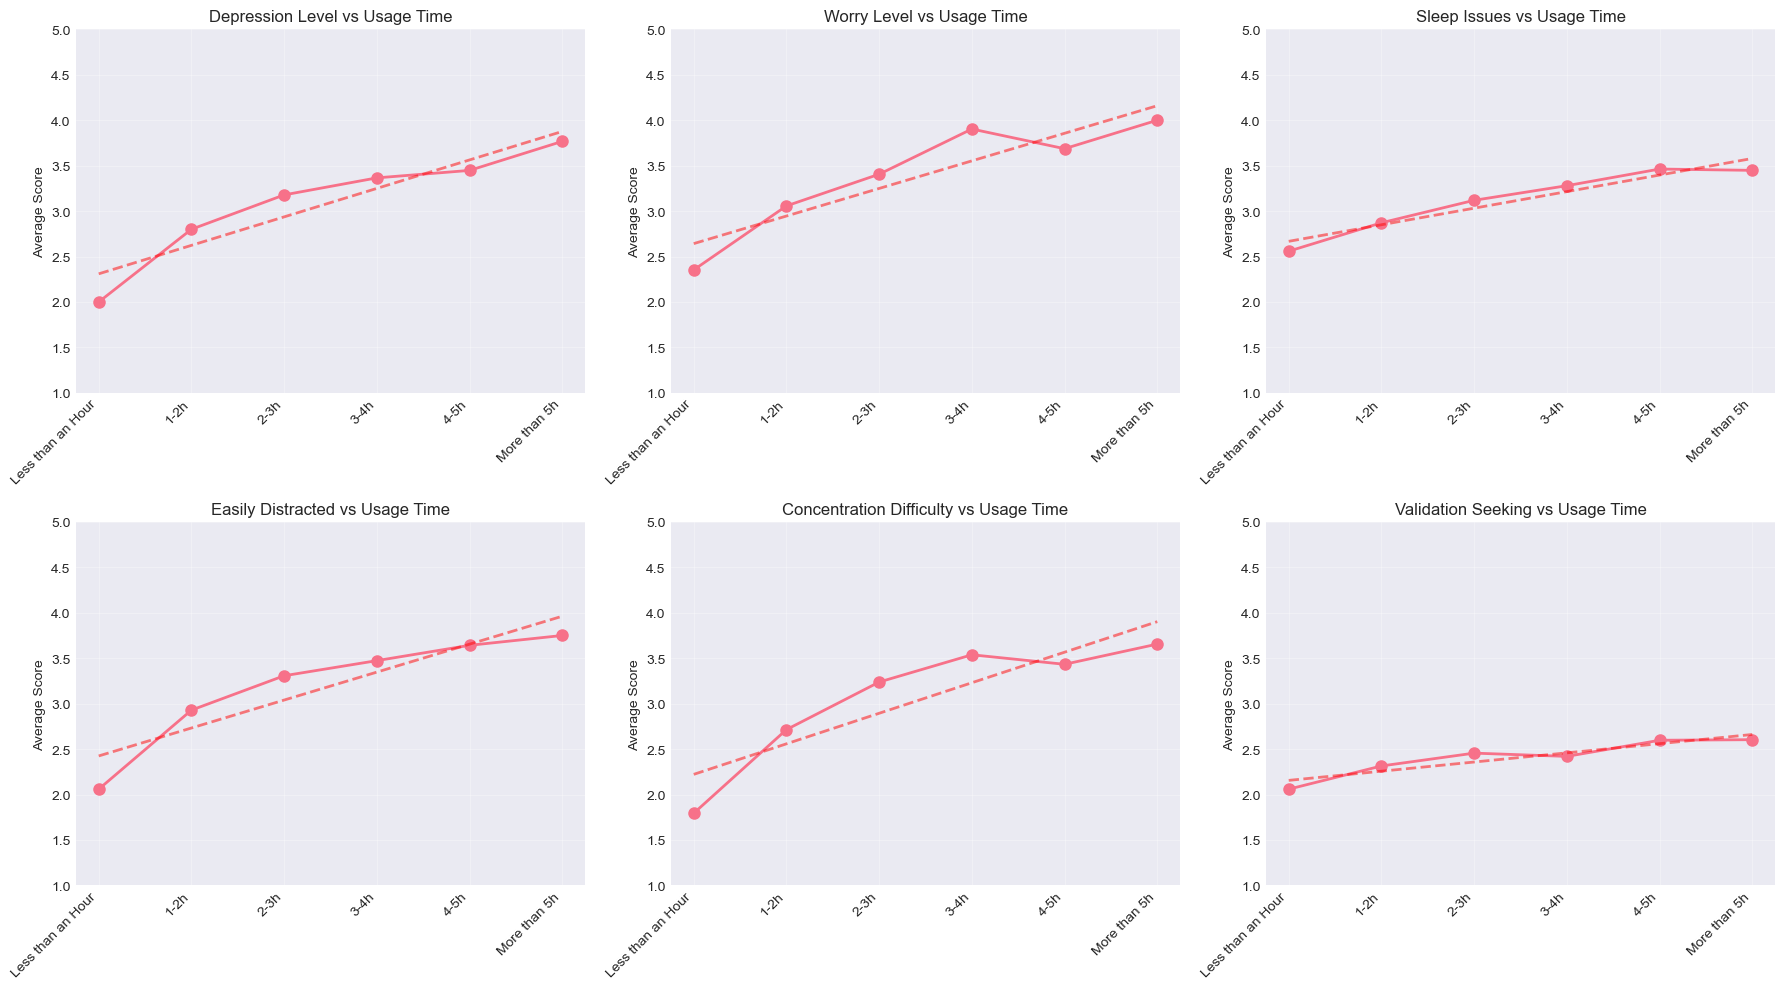

In [69]:
# Analyze mental health by usage time category
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

targets_to_plot = ['depression_level', 'worry_level', 'sleep_issues', 
                   'easily_distracted', 'concentration_difficulty', 'validation_seeking']

for idx, target in enumerate(targets_to_plot):
    # Group by usage time and calculate mean
    usage_impact = df.groupby('daily_usage_time')[target].mean().reindex(existing_order)
    
    axes[idx].plot(range(len(usage_impact)), usage_impact.values, marker='o', linewidth=2, markersize=8)
    axes[idx].set_xticks(range(len(usage_impact)))
    axes[idx].set_xticklabels([t.replace(' hours', 'h').replace('Between ', '').replace(' and ', '-') 
                                for t in usage_impact.index], rotation=45, ha='right')
    axes[idx].set_ylabel('Average Score')
    axes[idx].set_title(f'{target.replace("_", " ").title()} vs Usage Time')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([1, 5])
    
    # Add trend line
    x = range(len(usage_impact))
    y = usage_impact.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axes[idx].plot(x, p(x), "r--", alpha=0.5, linewidth=2)

plt.tight_layout()
plt.show()

### Stastical Test

In [70]:
# Convert usage time to ordered categorical for Spearman correlation
usage_time_order_map = {
    'Less than an Hour': 1,
    'Between 1 and 2 hours': 2,
    'Between 2 and 3 hours': 3,
    'Between 3 and 4 hours': 4,
    'Between 4 and 5 hours': 5,
    'More than 5 hours': 6
}

In [71]:
df['usage_time_ordinal'] = df['daily_usage_time'].map(usage_time_order_map)

In [72]:
for target in mental_health_targets:
    # Spearman correlation (for ordinal data)
    valid_data = df[['usage_time_ordinal', target]].dropna()
    if len(valid_data) > 0:
        corr, p_value = spearmanr(valid_data['usage_time_ordinal'], valid_data[target])
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        print(f"\n{target.replace('_', ' ').title()}:")
        print(f"  Spearman correlation: {corr:+.3f} (p={p_value:.4f}) {significance}")


Depression Level:
  Spearman correlation: +0.318 (p=0.0000) ***

Worry Level:
  Spearman correlation: +0.309 (p=0.0000) ***

Sleep Issues:
  Spearman correlation: +0.174 (p=0.0001) ***

Easily Distracted:
  Spearman correlation: +0.328 (p=0.0000) ***

Concentration Difficulty:
  Spearman correlation: +0.307 (p=0.0000) ***


## 12. Demographic Differences in mental health

In [73]:
gender_comparison = df.groupby('gender')[mental_health_targets].mean()
print(gender_comparison.T)

gender                    Female  Male   NB  Non binary   Non-binary  \
depression_level            3.39  3.08 4.00         5.00        4.00   
worry_level                 3.69  3.39 5.00         5.00        5.00   
sleep_issues                3.18  3.25 1.00         1.00        4.00   
easily_distracted           3.42  3.23 3.00         5.00        3.00   
concentration_difficulty    3.33  3.12 2.00         4.00        3.00   

gender                    Nonbinary   There are others???  Trans  unsure   
depression_level                4.00                 1.00   5.00     3.00  
worry_level                     4.00                 1.00   5.00     2.00  
sleep_issues                    1.00                 1.00   5.00     5.00  
easily_distracted               4.00                 5.00   5.00     4.00  
concentration_difficulty        5.00                 3.00   5.00     4.00  


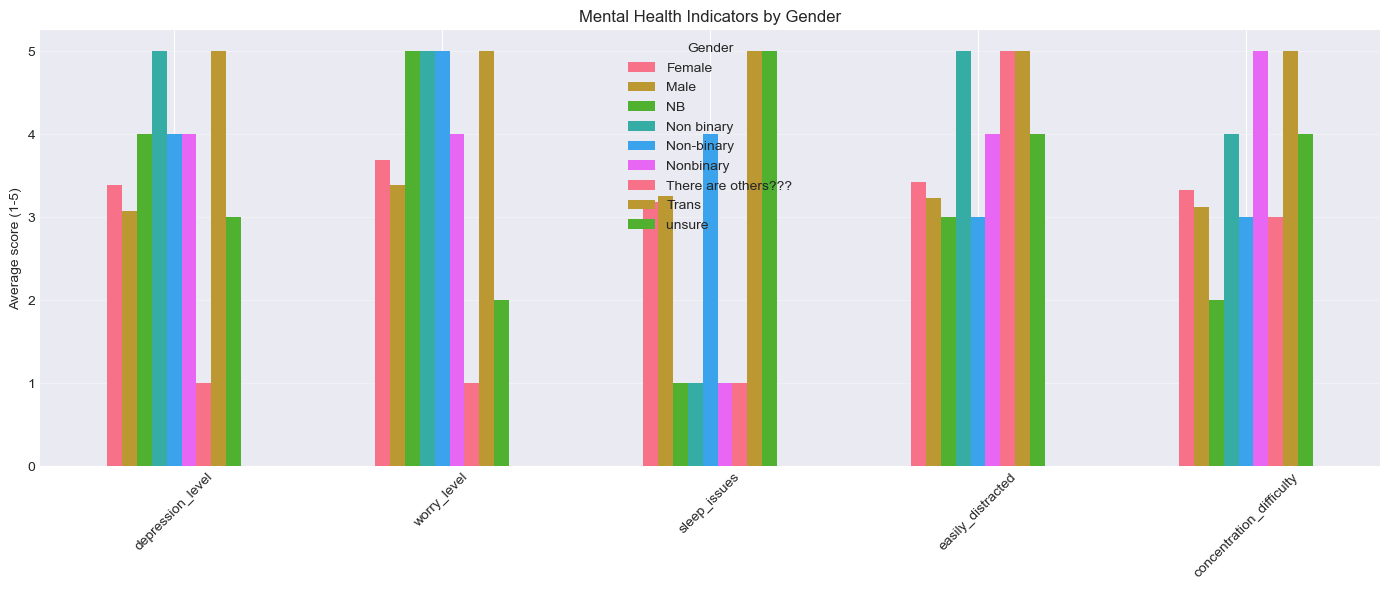

In [74]:
# visualize
gender_comparison.T.plot(kind='bar', figsize=(14,6), rot=45)
plt.ylabel('Average score (1-5)')
plt.title('Mental Health Indicators by Gender')
plt.legend(title='Gender')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Age Group differences

In [75]:
age_comparison = df.groupby('age_group')[mental_health_targets].mean()
print(age_comparison.T)


age_group                 <20  20-24  25-29  30-39  40+
depression_level         3.39   3.52   3.60   2.42 2.07
worry_level              3.89   3.71   3.83   2.76 2.55
sleep_issues             3.44   3.32   3.28   2.61 2.55
easily_distracted        3.39   3.54   3.53   2.70 2.68
concentration_difficulty 3.33   3.48   3.57   2.48 2.21


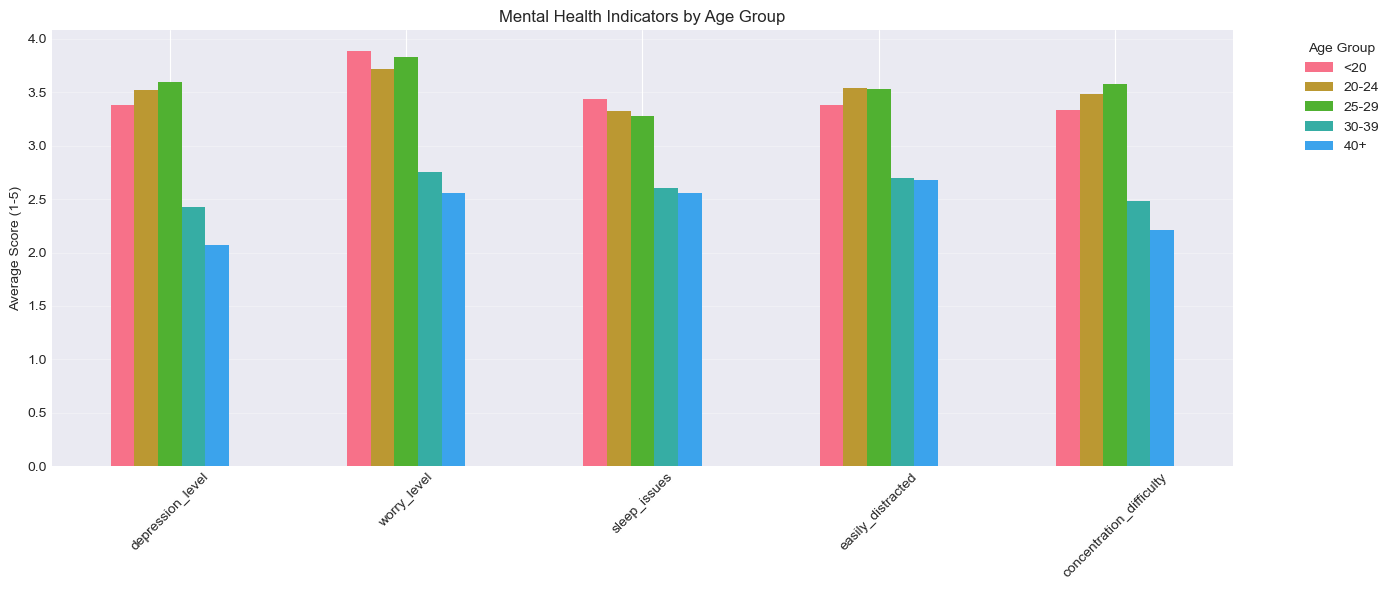

In [76]:
# Visualize
age_comparison.T.plot(kind='bar', figsize=(14, 6), rot=45)
plt.ylabel('Average Score (1-5)')
plt.title('Mental Health Indicators by Age Group')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 13. Feature Engineering

In [77]:
# social media addiction score (1-5)
df['social_media_addiction_score'] = df[['usage_without_purpose', 'distraction_level', 'restlessness']].mean(axis=1)

In [78]:
# mental health risk score(1-5)
df['mental_health_risk_score'] = df[['depression_level', 'worry_level', 'easily_distracted']].mean(axis=1)

In [79]:
# digital well-being score (0-100, higher is better)
negative_indicators = ['depression_level', 'worry_level', 'sleep_issues', 'easily_distracted', 
                       'concentration_difficulty', 'interest_fluctuation']
wellbeing_components =[(5 - df[col]) for col in negative_indicators]
df['digital_wellbeing_score'] = (sum(wellbeing_components) / len(wellbeing_components) / 5) * 100

In [ ]:
# high usage binary (> 3 hours per day)
df['hig_usage'] = (df['daily_usage_hours'] > 3).astype(int)

In [81]:
# platforms diversity score
df['platforms_diversity'] = df['num_platforms'] / df['num_platforms'].max()

In [83]:
# summary
new_features = ['social_media_addiction_score', 'mental_health_risk_score', 
                'digital_wellbeing_score', 'hig_usage', 'platforms_diversity']
print("\nNew Features Summary:")
print(df[new_features].describe().T)



New Features Summary:
                              count  mean   std  min   25%   50%   75%   max
social_media_addiction_score 481.00  3.15  0.98 1.00  2.33  3.33  4.00  5.00
mental_health_risk_score     481.00  3.39  1.02 1.00  2.67  3.33  4.33  5.00
digital_wellbeing_score      481.00 34.06 19.18 0.00 20.00 33.33 46.67 80.00
hig_usage                    481.00  0.57  0.50 0.00  0.00  1.00  1.00  1.00
platforms_diversity          481.00  0.47  0.22 0.11  0.33  0.44  0.67  1.00


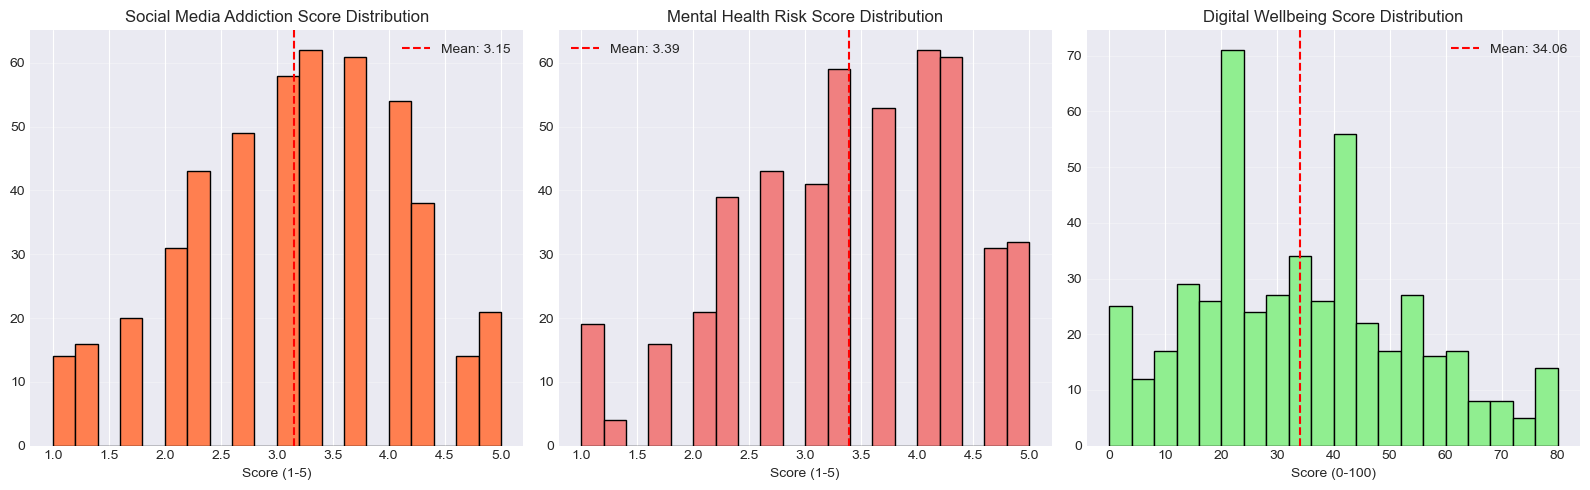

In [84]:
# Visualize composite scores
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].hist(df['social_media_addiction_score'], bins=20, edgecolor='black', color='coral')
axes[0].set_xlabel('Score (1-5)')
axes[0].set_title('Social Media Addiction Score Distribution')
axes[0].axvline(df['social_media_addiction_score'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["social_media_addiction_score"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df['mental_health_risk_score'], bins=20, edgecolor='black', color='lightcoral')
axes[1].set_xlabel('Score (1-5)')
axes[1].set_title('Mental Health Risk Score Distribution')
axes[1].axvline(df['mental_health_risk_score'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["mental_health_risk_score"].mean():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

axes[2].hist(df['digital_wellbeing_score'], bins=20, edgecolor='black', color='lightgreen')
axes[2].set_xlabel('Score (0-100)')
axes[2].set_title('Digital Wellbeing Score Distribution')
axes[2].axvline(df['digital_wellbeing_score'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["digital_wellbeing_score"].mean():.2f}')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### correlation with composite scores

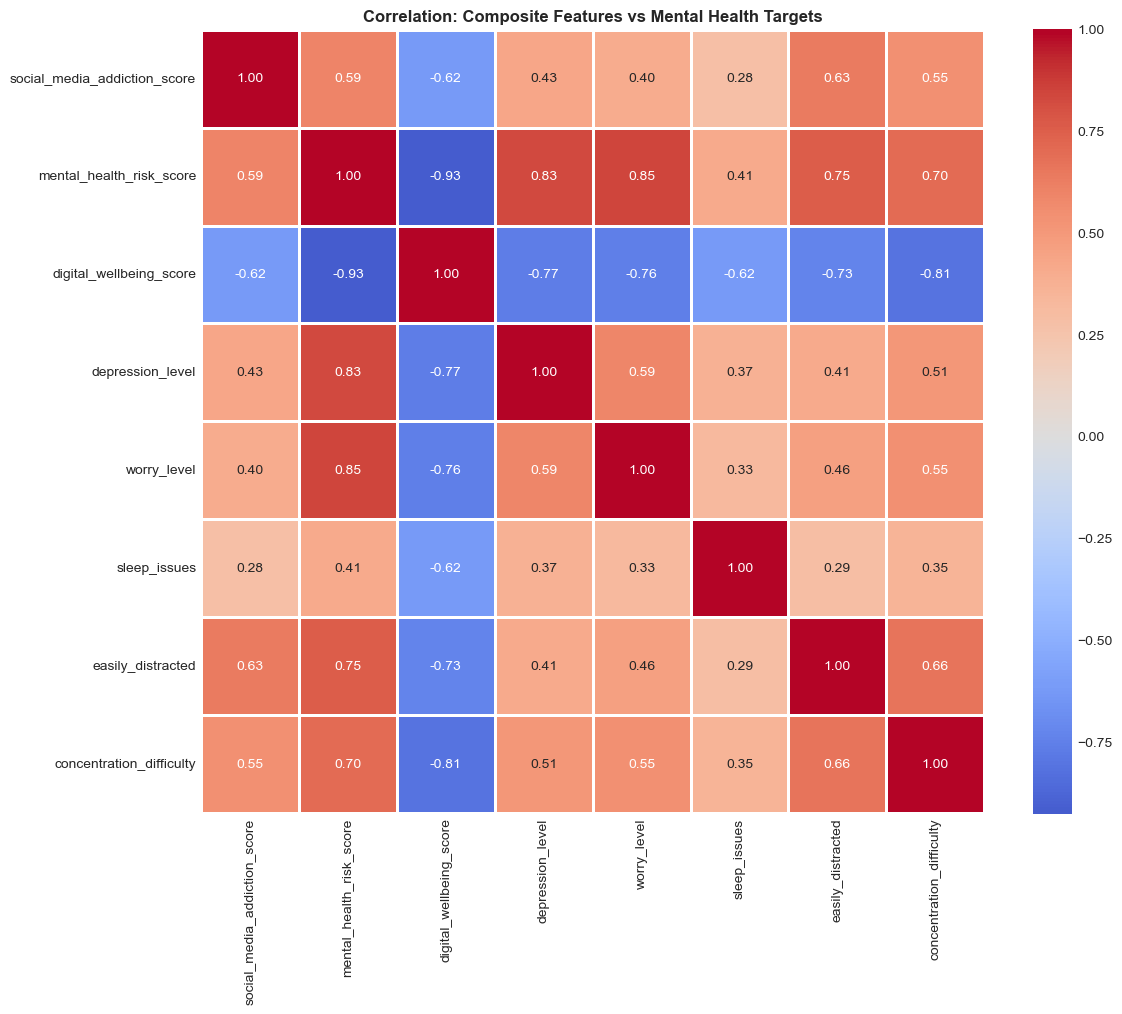

In [85]:
# Analyze correlation between new composite features and targets
composite_corr = df[['social_media_addiction_score', 'mental_health_risk_score', 
                     'digital_wellbeing_score'] + mental_health_targets].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(composite_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation: Composite Features vs Mental Health Targets', fontweight='bold')
plt.tight_layout()
plt.show()

## 15. Key Insights and Recomendations

### 1. Demographics
- **Age** Predominantly young adults (median: around 22 years)
- **Gender** Mix of male and female respondents
- **Occupation** Majority are University Students
- **Social Media Usage** High adoption rate

### 2. Social media usage patterns
- **Average**: use around 3-4 hours daily
- **Most popular Platforms**: Facebook, Instagram and Youtube
- **Platform Diversity**: Users averge around 4-6 platforms
- **Concerning**: High usage with pupose scores

### 3. Mental Health Indicators
- **sleep issues**: CRITICAL - mean score around 4-5 
- **Distractions**: High correlation with usage time
- **Depression/Anxiety**: Moderate levels present
- **Concentration**: Difficulties reported

### 4. Recomendations for model
- **Target variables** like *depresion_level*, *sleep_issues*, *easily_distracted*, *worry_level*, *concetration_dificulty*

### 5. Predictors:
There are some predictors I should consider in the train of model: *daily_usage_hours*, *num_platforms*, *usage_without_purpose*, *distraction_level*, *social_comparison*, *age_group*

### 6. Model Type
Multi output regression like RandomForest or XGBoost


## 16. Save processed dataset

In [86]:
missing_before = df.isnull().sum()
missing_before

timestamp                        0
age                              0
gender                           0
relationship_status              0
occupation_status                0
organization                    30
uses_social_media                0
platforms                        0
daily_usage_time                 0
usage_without_purpose            0
distraction_level                0
restlessness                     0
easily_distracted                0
worry_level                      0
concentration_difficulty         0
social_comparison                0
comparison_feelings              0
validation_seeking               0
depression_level                 0
interest_fluctuation             0
sleep_issues                     0
age_group                        0
daily_usage_hours                0
num_platforms                    0
depression_level_risk            0
worry_level_risk                 0
sleep_issues_risk                0
easily_distracted_risk           0
usage_time_ordinal  

In [88]:
col_with_nulls = missing_before[missing_before > 0].index[0]
col_with_nulls

'organization'

In [90]:
col_dtype = df[col_with_nulls].dtype
col_dtype

dtype('O')

In [91]:
mode_value = df[col_with_nulls].mode()[0]
mode_value

'University'

In [93]:
university_count = (df[col_with_nulls] == 'University').sum()
university_count


np.int64(239)

In [94]:
# fill with 'unknown'
df['organization'] = df['organization'].fillna('unknown')
print('Null values after filling:', df['organization'].isnull().sum())

Null values after filling: 0


In [95]:
df

,timestamp,age,gender,relationship_status,occupation_status,organization,uses_social_media,platforms,daily_usage_time,usage_without_purpose,distraction_level,restlessness,easily_distracted,worry_level,concentration_difficulty,social_comparison,comparison_feelings,validation_seeking,depression_level,interest_fluctuation,sleep_issues,age_group,daily_usage_hours,num_platforms,depression_level_risk,worry_level_risk,sleep_issues_risk,easily_distracted_risk,usage_time_ordinal,social_media_addiction_score,mental_health_risk_score,digital_wellbeing_score,hig_usage,platforms_diversity
0,4/18/2022 19:18:47,21.00,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,20-24,2.50,6,High,Low,High,High,3,3.33,4.00,13.33,0,0.67
1,4/18/2022 19:19:28,21.00,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,20-24,6.00,6,High,High,High,High,6,3.00,4.67,10.00,1,0.67
2,4/18/2022 19:25:59,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,20-24,3.50,4,High,High,High,Low,4,2.00,3.67,26.67,1,0.44
3,4/18/2022 19:29:43,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,20-24,6.00,2,High,High,Low,Medium,6,2.33,4.00,33.33,1,0.22
4,4/18/2022 19:33:31,21.00,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,20-24,2.50,3,High,High,Low,High,3,4.00,4.33,23.33,0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.00,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4,20-24,2.50,3,Medium,Medium,High,High,3,3.33,3.33,26.67,0,0.33
477,5/22/2022 0:01:05,26.00,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1,25-29,1.50,2,High,High,Low,Medium,2,1.67,3.67,33.33,0,0.22
478,5/22/2022 10:29:21,29.00,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2,25-29,2.50,2,Low,Low,Low,Medium,3,3.33,2.33,53.33,0,0.22
479,7/14/2022 19:33:47,21.00,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4,20-24,2.50,6,High,Medium,High,Medium,3,2.33,3.33,30.00,0,0.67


In [97]:
# save processed dataset
output_path = PROCESSED_DATA_DIR / '08_cleaned_data_mental_health_social_media.csv'

In [98]:
df.to_csv(output_path, index=False)
print('Dataset saved successfully!')

Dataset saved successfully!
